In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import warnings
warnings.filterwarnings('ignore')

#Visualisation libraries

import seaborn as sns
import matplotlib.pyplot as plt

#To scale our data
from sklearn.preprocessing import StandardScaler

#To split the data into training and testing set
from sklearn.model_selection import train_test_split

#Classification model- Support Vector Machine
from sklearn.svm import SVC

#Classification model performance metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [4]:
df=pd.read_csv(r"D:\intern dataset.csv")

In [5]:
df


,labels,0_before_rr,0_after-rr,0_p,0_t,0_r,0_s,0_q,0_qeres,0_pq,...,1_q,1_qeres,1_pq,1_qt,1_st,1_qeres_0,1_qeres_1,1_qeres_2,1_qeres_3,1_qeres_4
0,NN,2,194,0.003261,0.159554,-0.046726,-0.046726,-0.129022,4,17,...,-0.131451,29.0,17.0,95.0,49.0,-0.131451,-0.015809,0.109493,-0.153622,-0.200331
1,NN,194,188,-0.058462,0.067970,0.285091,-0.272093,-0.062109,25,3,...,-0.048727,25.0,2.0,76.0,49.0,-0.048727,0.034657,0.282264,-0.013981,-0.226871
2,NN,188,194,-0.012959,-0.089749,0.329466,-0.204659,-0.012971,29,1,...,-0.005256,29.0,5.0,53.0,19.0,-0.005256,0.007639,0.116198,0.271552,-0.114414
3,NN,194,198,-0.032815,-0.113236,0.398437,-0.178191,-0.068497,36,9,...,-0.069992,35.0,26.0,76.0,15.0,-0.069992,-0.049489,0.030777,0.378075,-0.074389
4,NN,198,196,-0.047353,0.164835,0.364677,-0.207953,-0.061457,39,6,...,-0.072007,35.0,25.0,115.0,55.0,-0.072007,-0.053251,0.044583,0.313201,-0.157637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426586,NN,76,148,-0.345439,1.086720,-0.213846,-0.213846,-0.699650,24,11,...,-0.443458,1.0,8.0,29.0,20.0,-0.443458,-0.443458,-0.443458,-0.443458,-0.443458
426587,NN,148,104,0.095040,0.804837,0.211167,0.211167,0.008211,4,25,...,-0.224660,50.0,9.0,67.0,8.0,-0.224660,-0.120400,-0.016600,0.028074,0.123550
426588,NN,32,22,1.603278,-0.518048,-0.531231,-0.531231,-1.296207,16,14,...,0.521029,8.0,6.0,39.0,25.0,0.521029,0.490847,0.369275,0.281510,0.121812
426589,NN,56,82,-0.942216,-1.074539,-0.955163,-1.249941,-0.955163,7,2,...,0.940757,73.0,6.0,115.0,36.0,0.940757,1.275964,0.376596,-0.212226,-0.621249


In [5]:
df.shape

(426591, 33)

In [6]:
df.size

14077503

In [7]:
df.describe()

,0_before_rr,0_after-rr,0_p,0_t,0_r,0_s,0_q,0_qeres,0_pq,0_qt,...,1_q,1_qeres,1_pq,1_qt,1_st,1_qeres_0,1_qeres_1,1_qeres_2,1_qeres_3,1_qeres_4
count,426591.000000,426591.000000,426591.000000,426591.000000,426591.000000,426591.000000,426591.000000,426591.000000,426591.000000,426591.000000,...,251976.000000,251976.000000,251976.000000,251976.000000,251976.000000,251976.000000,251976.000000,251976.000000,251976.000000,251976.000000
mean,229.428994,229.528063,0.060205,0.571717,0.260093,-0.158574,-0.077361,19.515555,12.388290,55.025230,...,-0.169446,7.055851,10.087481,29.150141,12.006810,-0.169446,-0.183518,-0.197956,-0.213318,-0.247897
std,52.765916,55.298502,0.156438,0.563064,0.403469,0.368323,0.121842,14.753913,10.731138,37.906418,...,0.160498,10.529824,6.950514,16.005089,7.918052,0.160498,0.165093,0.193692,0.222878,0.214587
min,2.000000,14.000000,-1.601843,-1.640672,-2.224594,-3.106228,-2.931771,0.000000,1.000000,2.000000,...,-1.877860,0.000000,1.000000,3.000000,1.000000,-1.877860,-1.877860,-1.877860,-1.851834,-1.851834
25%,192.000000,192.000000,-0.007642,0.142914,-0.034951,-0.483457,-0.107943,7.000000,5.000000,28.000000,...,-0.237663,2.000000,5.000000,18.000000,6.000000,-0.237663,-0.267482,-0.316498,-0.370283,-0.411905
50%,224.000000,224.000000,0.030988,0.366103,0.065296,-0.061481,-0.061239,19.000000,10.000000,44.000000,...,-0.126988,4.000000,8.000000,28.000000,10.000000,-0.126988,-0.160528,-0.212879,-0.254851,-0.257172
75%,270.000000,270.000000,0.087963,1.092672,0.629200,-0.012880,-0.029183,30.000000,17.000000,65.000000,...,-0.063244,6.000000,15.000000,37.000000,18.000000,-0.063244,-0.070056,-0.066413,-0.065075,-0.071536
max,2228.000000,10964.000000,3.341772,2.759539,2.434247,2.404205,2.050436,232.000000,128.000000,274.000000,...,1.294161,140.000000,127.000000,248.000000,115.000000,1.294161,1.275964,2.099905,1.437327,1.253709


In [8]:
df.isnull()

,labels,0_before_rr,0_after-rr,0_p,0_t,0_r,0_s,0_q,0_qeres,0_pq,...,1_q,1_qeres,1_pq,1_qt,1_st,1_qeres_0,1_qeres_1,1_qeres_2,1_qeres_3,1_qeres_4
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426586,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
426587,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
426588,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
426589,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().any()

labels         False
0_before_rr    False
0_after-rr     False
0_p            False
0_t            False
0_r            False
0_s            False
0_q            False
0_qeres        False
0_pq           False
0_qt           False
0_st           False
0_qeres_0      False
0_qeres_1      False
0_qeres_2      False
0_qeres_3      False
0_qeres_4      False
1_before-rr     True
1_after-rr      True
1_p             True
1_t             True
1_r             True
1_s             True
1_q             True
1_qeres         True
1_pq            True
1_qt            True
1_st            True
1_qeres_0       True
1_qeres_1       True
1_qeres_2       True
1_qeres_3       True
1_qeres_4       True
dtype: bool

In [10]:
df.isnull().sum()

labels              0
0_before_rr         0
0_after-rr          0
0_p                 0
0_t                 0
0_r                 0
0_s                 0
0_q                 0
0_qeres             0
0_pq                0
0_qt                0
0_st                0
0_qeres_0           0
0_qeres_1           0
0_qeres_2           0
0_qeres_3           0
0_qeres_4           0
1_before-rr    174615
1_after-rr     174615
1_p            174615
1_t            174615
1_r            174615
1_s            174615
1_q            174615
1_qeres        174615
1_pq           174615
1_qt           174615
1_st           174615
1_qeres_0      174615
1_qeres_1      174615
1_qeres_2      174615
1_qeres_3      174615
1_qeres_4      174615
dtype: int64

In [11]:
df.fillna(pd)

,labels,0_before_rr,0_after-rr,0_p,0_t,0_r,0_s,0_q,0_qeres,0_pq,...,1_q,1_qeres,1_pq,1_qt,1_st,1_qeres_0,1_qeres_1,1_qeres_2,1_qeres_3,1_qeres_4
0,NN,2,194,0.003261,0.159554,-0.046726,-0.046726,-0.129022,4,17,...,-0.131451,29,17,95,49,-0.131451,-0.0158089,0.109493,-0.153622,-0.200331
1,NN,194,188,-0.058462,0.067970,0.285091,-0.272093,-0.062109,25,3,...,-0.0487265,25,2,76,49,-0.0487265,0.0346566,0.282264,-0.0139808,-0.226871
2,NN,188,194,-0.012959,-0.089749,0.329466,-0.204659,-0.012971,29,1,...,-0.00525621,29,5,53,19,-0.00525621,0.00763895,0.116198,0.271552,-0.114414
3,NN,194,198,-0.032815,-0.113236,0.398437,-0.178191,-0.068497,36,9,...,-0.0699923,35,26,76,15,-0.0699923,-0.0494889,0.0307773,0.378075,-0.0743887
4,NN,198,196,-0.047353,0.164835,0.364677,-0.207953,-0.061457,39,6,...,-0.072007,35,25,115,55,-0.072007,-0.0532507,0.0445832,0.313201,-0.157637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426586,NN,76,148,-0.345439,1.086720,-0.213846,-0.213846,-0.699650,24,11,...,-0.443458,1,8,29,20,-0.443458,-0.443458,-0.443458,-0.443458,-0.443458
426587,NN,148,104,0.095040,0.804837,0.211167,0.211167,0.008211,4,25,...,-0.22466,50,9,67,8,-0.22466,-0.1204,-0.0165999,0.0280736,0.12355
426588,NN,32,22,1.603278,-0.518048,-0.531231,-0.531231,-1.296207,16,14,...,0.521029,8,6,39,25,0.521029,0.490847,0.369275,0.28151,0.121812
426589,NN,56,82,-0.942216,-1.074539,-0.955163,-1.249941,-0.955163,7,2,...,0.940757,73,6,115,36,0.940757,1.27596,0.376596,-0.212226,-0.621249


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426591 entries, 0 to 426590
Data columns (total 33 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   labels       426591 non-null  object 
 1   0_before_rr  426591 non-null  int64  
 2   0_after-rr   426591 non-null  int64  
 3   0_p          426591 non-null  float64
 4   0_t          426591 non-null  float64
 5   0_r          426591 non-null  float64
 6   0_s          426591 non-null  float64
 7   0_q          426591 non-null  float64
 8   0_qeres      426591 non-null  int64  
 9   0_pq         426591 non-null  int64  
 10  0_qt         426591 non-null  int64  
 11  0_st         426591 non-null  int64  
 12  0_qeres_0    426591 non-null  float64
 13  0_qeres_1    426591 non-null  float64
 14  0_qeres_2    426591 non-null  float64
 15  0_qeres_3    426591 non-null  float64
 16  0_qeres_4    426591 non-null  float64
 17  1_before-rr  251976 non-null  float64
 18  1_after-rr   251976 non-

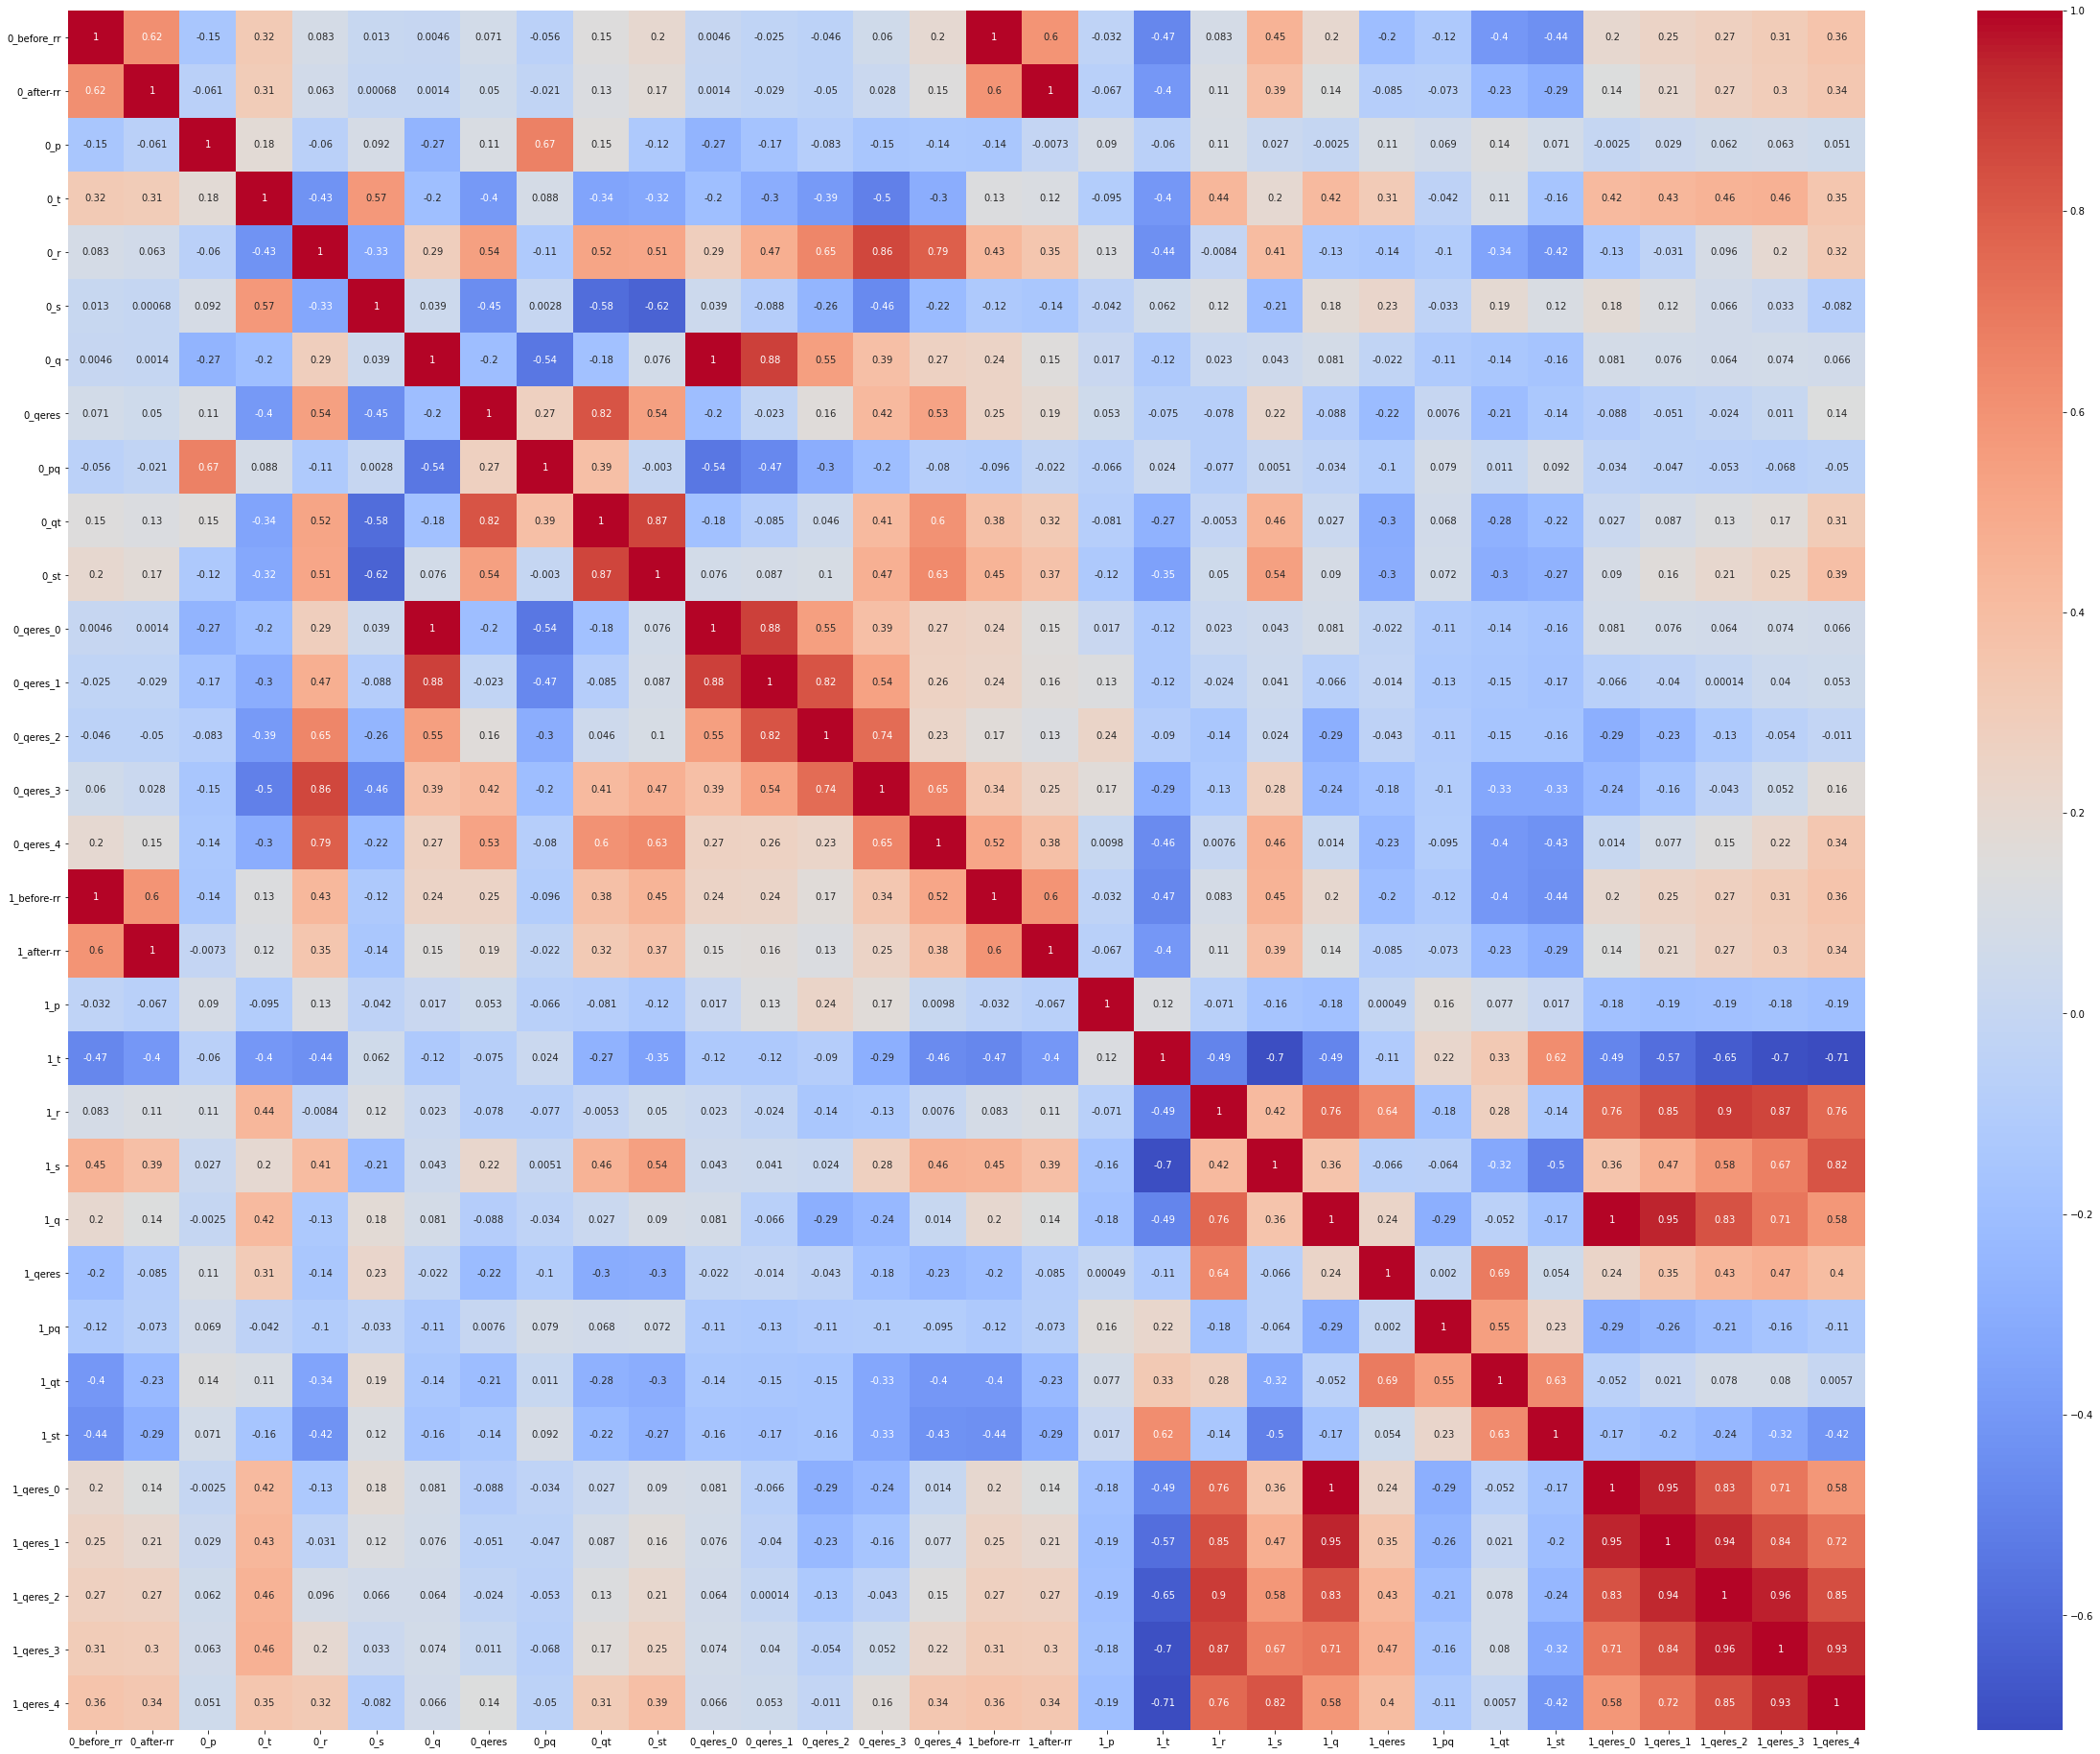

In [17]:
plt.figure(figsize=(42,33))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()